# Analys av E-handelsdata


In [6]:
from src.io_utils import load_data
from src.ecommerce import EcommerceAnalyzer
import src.viz as V

%matplotlib inline

df = load_data("data/ecommerce_sales.csv")    

analyzer = EcommerceAnalyzer(df)


## **1. Vad säljer vi?**
Electronics, Sports och Clothing driver mest intäkt. 

      category     revenue
0  Electronics  1364228.07
1       Sports   734653.42
2     Clothing   586744.91
3         Home   511070.87
4       Beauty   163053.97
5         Toys   143015.99


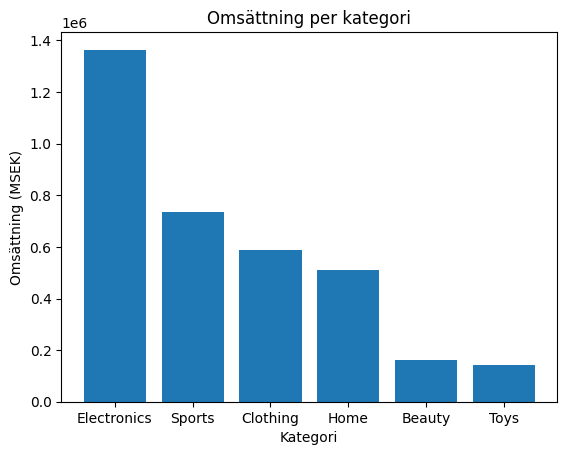

In [7]:
revenue_by_category = analyzer.revenue_category()

print(revenue_by_category)

V.plot_revenue_by_category(revenue_by_category)                 

**Graf - 1 - Intäkt per kategori:** Elektronik står för nästan hälften av den totala omsättningen. Sport och kläder bidrar också med bra intäkter.

## **2. Var säljer vi?**

Stockholm står för den största intäkten – över en miljon kronor – följt av Göteborg med under 900 tkr.

In [8]:
revenue_city = analyzer.revenue_city()

print(revenue_city)

        city     revenue
0  Stockholm  1227201.94
1   Göteborg   859019.65
2      Malmö   567926.32
3    Uppsala   551478.42
4   Västerås   297140.90


## **3. När säljer vi?**
I början av året säljer vi men trenden är neråt tills vår säsongen.

     month    revenue
0  2024-01  664083.32
1  2024-02  548462.03
2  2024-03  487602.00
3  2024-04  580194.83
4  2024-05  632165.16
5  2024-06  590259.89


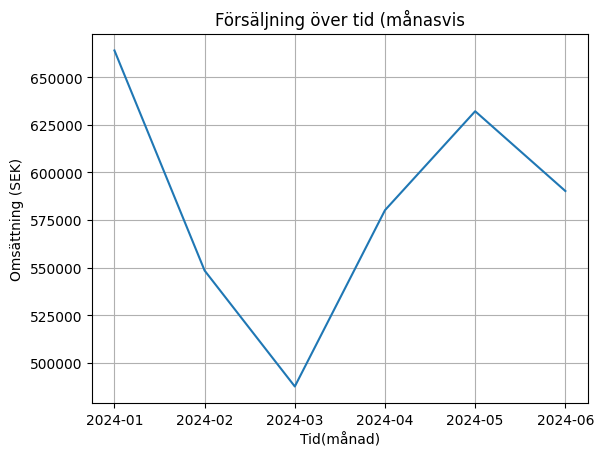

In [9]:
revenue_by_month = analyzer.calculate_revenue_by_month()              

print(revenue_by_month)                                         

revenue_by_month = revenue_by_month.reset_index(drop=True)      

V.plot_revenue_by_month(revenue_by_month)                         

**Graf - 2 - Försäljning över tid:** Grafen visar att försäljningen minskar fram till mars, för att sedan öka kraftigt och nå nästan liknande nivåer i maj.

## **4. Hur ser en typisk order ut?**
För att förstå en "typisk" order räcker det inte med medelvärdet (AOV). Vi måste också analysera spridningen (distributionen) av alla ordervärden för att se om medelvärdet är missvisande.

Average Order Value (AOV): 1401.11 kr
count    2500.000000
mean     1401.106892
std      1166.944967
min        50.000000
25%       577.960000
50%      1088.690000
75%      1884.750000
max      9192.600000
Name: revenue, dtype: float64


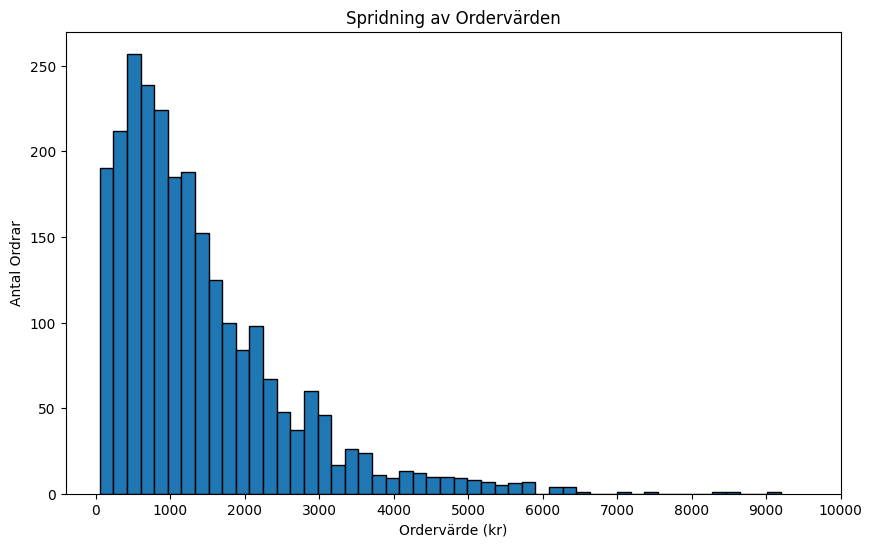

In [10]:
aov = analyzer.average_order_value()
print(f"Average Order Value (AOV): {aov:.2f} kr")


order_stats = df['revenue'].describe()
print(order_stats)


V.plot_order_distribution(df)

**Graf - 3 - Spridning av Ordervärden:** Som histogrammet visar är spridningen stor. Majoriteten av alla ordrar har ett lågt värde (under ~2000 kr), medan ett fåtal dyra ordrar drar upp medelvärdet (AOV).

## Slutsatser och Rekommendationer
En genomsnittlig order (medianen) ligger på 1 088 kr.
Vi rekommenderar att testa kampanjer som uppmuntrar kunder att handla mer, till exempel "köp för 200 kr mer och få fri frakt". Det kan vara mer lönsamt än att lägga fokus på att hitta nya storkunder.

Satsa marknadsföringsbudgeten på Electronics i januari och på Sports och Clothing i maj, då dessa kategorier har sina naturliga försäljningstoppar.

Electronics, Sports och Clothing är de mest betydelsefulla kategorierna och bör prioriteras i både kampanjer och synlighet på webbplatsen.